Import Libraries

In [389]:
import openpyxl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Read in sheets of xlsx file

In [390]:
df1 = pd.read_excel('data/Muesli Project raw data.xlsx', 0, header=1)
df2 = pd.read_excel('data/Muesli Project raw data.xlsx', 1, header=0)
df3 = pd.read_excel('data/Muesli Project raw data.xlsx', 2, header=0)
df4 = pd.read_excel('data/Muesli Project raw data.xlsx', 3, header=0)

In [391]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()
df4.columns = df4.columns.str.lower()

In [392]:
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace(' ', '_')
df4.columns = df4.columns.str.replace(' ', '_')

Understand your data

In [393]:
df1.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [394]:
print(df1.origin_channel.unique())
print(df1['country/region'].unique())
print(df1.quantity.max())

['Email' 'Sales' 'Facebook']
['United States']
14


In [395]:
df2.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [396]:
df3.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [397]:
df4.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [398]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   country/region  9994 non-null   object        
 8   city            9994 non-null   object        
 9   state           9994 non-null   object        
 10  postal_code     9983 non-null   float64       
 11  region          9994 non-null   object        
 12  category        9994 non-null   object        
 13  sub-category    9994 non-null   object        
 14  product_id      9994 non-null   object        
 15  sale

In [399]:
print(df1.order_date.min())
print(df1.order_date.max())

2017-01-03 00:00:00
2020-12-30 00:00:00


In [400]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [401]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [402]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


Clean your data

In [403]:
df1['order_id'].duplicated().value_counts()

# one order can contain several products

False    5009
True     4985
Name: order_id, dtype: int64

In [404]:
df1.drop(columns=['index', 'customer_id', 'customer_name', 'country/region', 'postal_code',
 'region', 'category', 'sub-category', 'product_id', 'sales', 'discount', 'profit'], inplace=True)

df1.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2


In [405]:
df1.drop_duplicates(keep='first', inplace=True)

In [406]:
df1.order_id.count()

8619

In [407]:
df2.drop(columns='customer_name', inplace=True)

df2.head()

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06


In [408]:
df2['order_id'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: order_id, Length: 333, dtype: bool

In [409]:
df2.order_id.count()

333

In [410]:
df3.drop(columns='row_id', inplace=True)

df3.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [411]:
df3.drop_duplicates(keep='first', inplace=True)

In [412]:
df3.shape
#df3.order_id.count()

(3003, 4)

In [413]:
df4.drop(columns='pickup_date', inplace=True)

df4.head()

,order_id,ready_to_ship_date
0,CA-2019-116540,2019-09-02
1,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05


In [414]:
df4.drop_duplicates(keep='first', inplace=True)

In [415]:
df4.order_id.count()

204

Combine dataframes

df1: Orders including date and types and contents of order <br>
df3: time from order date to on truck scan <br>
df4: time from ready to ship to pickup (express vs regular) <br>
df2: QR scan date, arrival date at the customer <br>

In [416]:
order_ready_truck = pd.merge(df3, df4, how='left', on='order_id', sort=False)
order_ready_truck.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT


In [417]:
order_ready_truck.order_id.count()

3003

In [418]:
order_arrival = pd.merge(order_ready_truck, df2, how='left', on='order_id', sort=False)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT


In [419]:
order_arrival.count()

order_id              3003
order_date            3003
on_truck_scan_date    3003
ship_mode             3003
ready_to_ship_date     204
arrival_scan_date      333
dtype: int64

In [420]:
order_arrival['order_weekday'] = order_arrival['order_date'].dt.dayofweek # dayofweek means weekdays, 0=Monday, 6=Sunday
order_arrival.head(15)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4
5,CA-2019-134474,2019-01-05,2019-01-11,Standard Processing,NaT,NaT,5
6,US-2019-164630,2019-01-04,2019-01-11,Standard Processing,NaT,NaT,4
7,CA-2019-158806,2019-01-07,2019-01-14,Standard Processing,NaT,NaT,0
8,CA-2019-140746,2019-01-15,2019-01-16,Express,NaT,NaT,1
9,CA-2019-126543,2019-01-09,2019-01-16,Standard Processing,NaT,NaT,2


In [421]:
weekday = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
    }

In [422]:
order_arrival['order_day'] = order_arrival['order_weekday'].map(weekday)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,order_day
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,Thursday
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,Wednesday
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,Thursday
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,Thursday
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,Friday


In [423]:
order_arrival.drop(columns='order_weekday', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_day
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,Thursday
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,Wednesday
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,Friday


Data augmentation + KPIs

In [424]:
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_day
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,Thursday
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,Wednesday
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,Friday


In [425]:
order_arrival['order_to_ready'] = order_arrival['ready_to_ship_date'] - order_arrival['order_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_day,order_to_ready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,Thursday,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,Wednesday,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,Thursday,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,Friday,NaT


In [426]:
print(order_arrival.order_to_ready.describe())
print(order_arrival.order_to_ready.info())

count                          204
mean     4 days 04:14:07.058823529
std      1 days 23:16:29.025426269
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                6 days 00:00:00
max                8 days 00:00:00
Name: order_to_ready, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: order_to_ready
Non-Null Count  Dtype          
--------------  -----          
204 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 46.9 KB
None


In [427]:
order_arrival['ordertoready'] = order_arrival['order_to_ready'].apply(lambda x: x.days)
order_arrival.drop(columns=['order_to_ready', 'ready_to_ship_date'], inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,Thursday,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,Wednesday,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,Friday,NaN


In [428]:
orderarrival_sub1 = order_arrival.sort_values('ordertoready')[order_arrival['ordertoready'] >= 0]
orderarrival_sub1.head()

/var/folders/gw/ybl02c7j7qbf71_tkz104z7m0000gn/T/ipykernel_5060/1007610362.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orderarrival_sub1 = order_arrival.sort_values('ordertoready')[order_arrival['ordertoready'] >= 0]


,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready
641,CA-2019-116540,2019-09-02,2019-09-03,Express,NaT,Monday,0.0
2501,US-2020-168116,2020-11-04,2020-11-04,Express,NaT,Wednesday,0.0
2502,CA-2020-121160,2020-11-04,2020-11-04,Express,NaT,Wednesday,0.0
2522,US-2020-153948,2020-11-06,2020-11-06,Express,NaT,Friday,0.0
2544,CA-2020-162096,2020-11-10,2020-11-12,Express,NaT,Tuesday,0.0


In [429]:
order_arrival['time_to_ship'] = order_arrival['on_truck_scan_date'] - order_arrival['order_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready,time_to_ship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,Thursday,NaN,4 days
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,Wednesday,NaN,7 days
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6 days
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6 days
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,Friday,NaN,5 days


In [430]:
print(order_arrival.time_to_ship.describe())
print(order_arrival.time_to_ship.info())

count                         3003
mean     6 days 02:31:02.937062937
std      2 days 11:25:02.970077306
min                0 days 00:00:00
25%                5 days 00:00:00
50%                7 days 00:00:00
75%                8 days 00:00:00
max               12 days 00:00:00
Name: time_to_ship, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: time_to_ship
Non-Null Count  Dtype          
--------------  -----          
3003 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 111.5 KB
None


In [431]:
order_arrival['timetoship'] = order_arrival['time_to_ship'].apply(lambda x: x.days)
order_arrival.drop(columns='time_to_ship', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready,timetoship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,Thursday,NaN,4
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,Wednesday,NaN,7
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,Friday,NaN,5


In [432]:
orderarrival_sub2 = order_arrival.sort_values('timetoship')[order_arrival['timetoship'] >= 0]
orderarrival_sub2.head()

/var/folders/gw/ybl02c7j7qbf71_tkz104z7m0000gn/T/ipykernel_5060/427014935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orderarrival_sub2 = order_arrival.sort_values('timetoship')[order_arrival['timetoship'] >= 0]


,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready,timetoship
2197,CA-2020-144484,2020-09-11,2020-09-11,Express,NaT,Friday,NaN,0
1014,CA-2019-108630,2019-11-18,2019-11-18,Express,NaT,Monday,NaN,0
2925,CA-2020-145219,2020-12-24,2020-12-24,Express,NaT,Thursday,NaN,0
1570,CA-2020-125115,2020-04-10,2020-04-10,Express,2020-04-14,Friday,NaN,0
1902,CA-2020-168109,2020-07-03,2020-07-03,Express,NaT,Friday,NaN,0


In [433]:
order_arrival['transit_time'] = order_arrival['arrival_scan_date'] - order_arrival['on_truck_scan_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,order_day,ordertoready,timetoship,transit_time
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,Thursday,NaN,4,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,Wednesday,NaN,7,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,Thursday,NaN,6,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,Friday,NaN,5,NaT


In [434]:
print(order_arrival.transit_time.describe())
print(order_arrival.transit_time.info())

count                          333
mean     4 days 14:29:11.351351351
std      1 days 04:47:16.148329809
min                1 days 00:00:00
25%                4 days 00:00:00
50%                5 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: transit_time, dtype: object
<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: transit_time
Non-Null Count  Dtype          
--------------  -----          
333 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 111.5 KB
None


In [435]:
order_arrival['transittime'] = order_arrival['transit_time'].apply(lambda x: x.days)
order_arrival.drop(columns=['transit_time', 'on_truck_scan_date'], inplace=True)
order_arrival.head()

,order_id,order_date,ship_mode,arrival_scan_date,order_day,ordertoready,timetoship,transittime
0,CA-2019-125206,2019-01-03,Express,NaT,Thursday,NaN,4,NaN
1,CA-2019-160304,2019-01-02,Standard Processing,NaT,Wednesday,NaN,7,NaN
2,US-2019-116365,2019-01-03,Standard Processing,NaT,Thursday,NaN,6,NaN
3,CA-2019-105207,2019-01-03,Standard Processing,NaT,Thursday,NaN,6,NaN
4,CA-2019-158211,2019-01-04,Standard Processing,NaT,Friday,NaN,5,NaN


In [436]:
orderarrival_sub3 = order_arrival.sort_values('transittime')[order_arrival['transittime'] >= 0]
orderarrival_sub3.head()

/var/folders/gw/ybl02c7j7qbf71_tkz104z7m0000gn/T/ipykernel_5060/3762438440.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orderarrival_sub3 = order_arrival.sort_values('transittime')[order_arrival['transittime'] >= 0]


,order_id,order_date,ship_mode,arrival_scan_date,order_day,ordertoready,timetoship,transittime
771,CA-2019-134208,2019-09-17,Standard Processing,2019-09-26,Tuesday,NaN,8,1.0
1336,US-2020-148551,2020-01-12,Standard Processing,2020-01-22,Sunday,NaN,9,1.0
1374,US-2020-105935,2020-01-26,Standard Processing,2020-02-06,Sunday,NaN,10,1.0
1703,CA-2020-141733,2020-05-07,Standard Processing,2020-05-15,Thursday,NaN,6,2.0
1122,US-2019-163881,2019-11-24,Standard Processing,2019-12-06,Sunday,NaN,10,2.0


In [437]:
sub1_express = orderarrival_sub1[orderarrival_sub1.ship_mode=='Express']
sub2_express = orderarrival_sub2[orderarrival_sub2.ship_mode=='Express']
sub3_express = orderarrival_sub3[orderarrival_sub3.ship_mode=='Express']

print(sub1_express['ship_mode'].unique())
print(sub2_express['ship_mode'].unique())
print(sub3_express['ship_mode'].unique())

['Express']
['Express']
['Express']


In [438]:
sub1_standard = orderarrival_sub1[orderarrival_sub1.ship_mode=='Standard Processing']
sub2_standard = orderarrival_sub2[orderarrival_sub2.ship_mode=='Standard Processing']
sub3_standard = orderarrival_sub3[orderarrival_sub3.ship_mode=='Standard Processing']

print(sub1_standard['ship_mode'].unique())
print(sub2_standard['ship_mode'].unique())
print(sub3_standard['ship_mode'].unique())

['Standard Processing']
['Standard Processing']
['Standard Processing']


In [439]:
dx1 = pd.read_excel('data/Muesli Project raw data.xlsx', 0, header=1)
dx2 = pd.read_excel('data/Muesli Project raw data.xlsx', 1, header=0)
dx3 = pd.read_excel('data/Muesli Project raw data.xlsx', 2, header=0)
dx4 = pd.read_excel('data/Muesli Project raw data.xlsx', 3, header=0)

dx1.columns = dx1.columns.str.lower()
dx2.columns = dx2.columns.str.lower()
dx3.columns = dx3.columns.str.lower()
dx4.columns = dx4.columns.str.lower()

dx1.columns = dx1.columns.str.replace(' ', '_')
dx2.columns = dx2.columns.str.replace(' ', '_')
dx3.columns = dx3.columns.str.replace(' ', '_')
dx4.columns = dx4.columns.str.replace(' ', '_')

dx1.drop(columns=['index', 'customer_id', 'customer_name', 'country/region', 'postal_code',
 'region', 'category', 'sub-category', 'product_id', 'sales', 'discount', 'profit'], inplace=True) # all orders
dx2.drop(columns='customer_name', inplace=True) # arrival scan date
dx3.drop(columns=['row_id', 'ship_mode', 'order_date'], inplace=True) # on truck scan date
dx4.drop(columns='pickup_date', inplace=True) # ready to ship date

dx1.drop_duplicates(keep='first', inplace=True)
dx2.drop_duplicates(keep='first', inplace=True)
dx3.drop_duplicates(keep='first', inplace=True)
dx4.drop_duplicates(keep='first', inplace=True)

In [440]:
dx1.order_id.count()

8619

In [441]:
dx14 = pd.merge(dx1, dx4, how='left', on='order_id', sort=False)
dx143 = pd.merge(dx14, dx3, how='left', on='order_id', sort=False)
dx = pd.merge(dx143, dx2, how='left', on='order_id', sort=False)

dx.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity,ready_to_ship_date,on_truck_scan_date,arrival_scan_date
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3,NaT,2019-01-23,NaT
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2,NaT,2019-03-13,NaT
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3,NaT,2019-06-26,NaT
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2,NaT,2019-06-19,NaT
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2,NaT,NaT,NaT


In [442]:
dx.order_id.count()

8621

In [443]:
dx['transportation'] = dx['arrival_scan_date'] - order_arrival['order_date']
dx.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity,ready_to_ship_date,on_truck_scan_date,arrival_scan_date,transportation
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3,NaT,2019-01-23,NaT,NaT
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2,NaT,2019-03-13,NaT,NaT
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3,NaT,2019-06-26,NaT,NaT
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2,NaT,2019-06-19,NaT,NaT
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2,NaT,NaT,NaT,NaT


In [444]:
dx['transportation'] = dx['transportation'].apply(lambda x: x.days)
dx.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity,ready_to_ship_date,on_truck_scan_date,arrival_scan_date,transportation
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3,NaT,2019-01-23,NaT,NaN
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2,NaT,2019-03-13,NaT,NaN
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3,NaT,2019-06-26,NaT,NaN
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2,NaT,2019-06-19,NaT,NaN
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2,NaT,NaT,NaT,NaN


In [445]:
dx_sub4 = dx.sort_values('transportation')[dx['transportation'] >= 0]
dx_sub4.head()

/var/folders/gw/ybl02c7j7qbf71_tkz104z7m0000gn/T/ipykernel_5060/1569491060.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dx_sub4 = dx.sort_values('transportation')[dx['transportation'] >= 0]


,order_id,order_date,ship_mode,origin_channel,city,state,quantity,ready_to_ship_date,on_truck_scan_date,arrival_scan_date,transportation
1284,CA-2019-112697,2019-12-18,Second Class,Sales,Tamarac,Florida,2,NaT,2019-12-23,2019-12-27,2.0
1130,CA-2019-160129,2019-11-23,First Class,Sales,Philadelphia,Pennsylvania,5,NaT,2019-11-25,2019-11-29,3.0
1544,CA-2020-144680,2020-03-31,First Class,Sales,Arlington,Texas,5,NaT,2020-04-03,2020-04-08,8.0
1690,US-2020-104451,2020-05-08,Second Class,Email,San Francisco,California,4,NaT,2020-05-13,2020-05-15,9.0
1478,CA-2020-155824,2020-03-10,Standard Class,Sales,Raleigh,North Carolina,1,NaT,2020-03-18,2020-03-23,11.0


In [446]:
dx_tra = dx_sub4.drop(columns=['order_id', 'order_date', 'ship_mode', 'origin_channel', 'state', 'quantity',
 'ready_to_ship_date', 'on_truck_scan_date', 'arrival_scan_date'], inplace=True)

Ploting

In [447]:
plt.style.use('fivethirtyeight')

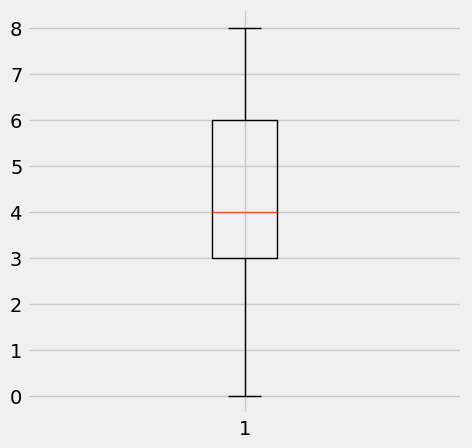

In [448]:
plt.figure(figsize =(5, 5))
plt.boxplot(x = orderarrival_sub1['ordertoready']);

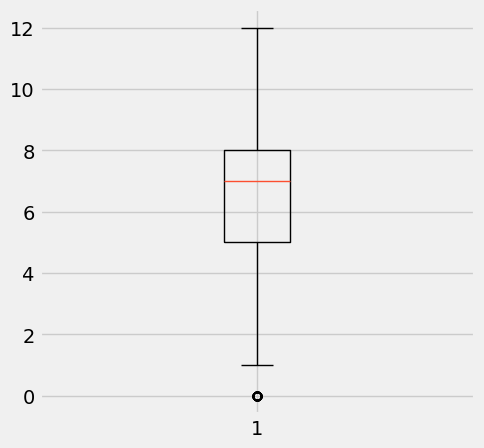

In [449]:
plt.figure(figsize =(5, 5))
plt.boxplot(x = orderarrival_sub2['timetoship']);

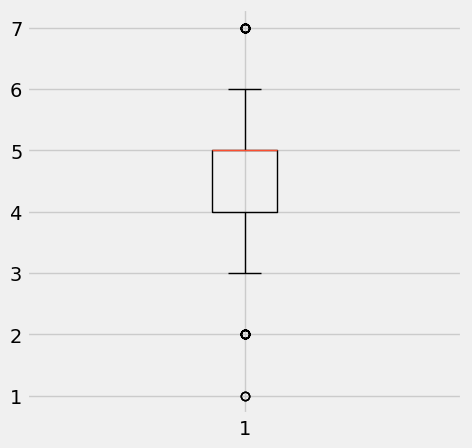

In [450]:
plt.figure(figsize =(5, 5))
plt.boxplot(x = orderarrival_sub3['transittime']);

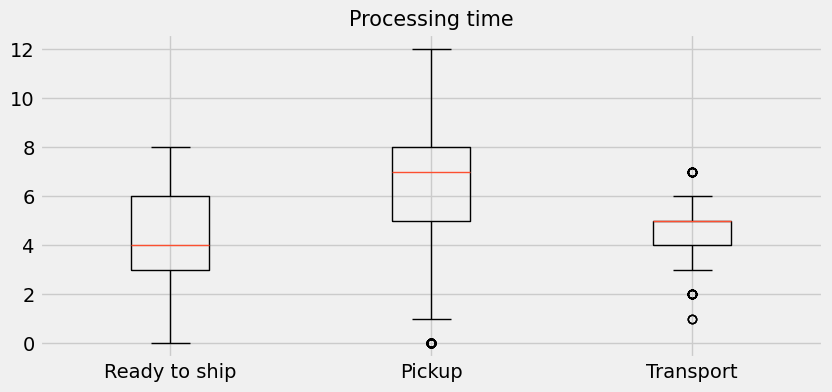

In [451]:
plt.figure(figsize=(9, 4))

plt.boxplot(x = [orderarrival_sub1['ordertoready'], orderarrival_sub2['timetoship'], orderarrival_sub3['transittime']])

plt.xticks(ticks=[1, 2, 3], labels=['Ready to ship', 'Pickup', 'Transport'])

plt.title('Processing time', fontsize = 15);

Text(0.5, 1.0, 'Processing time (Express delivery)')

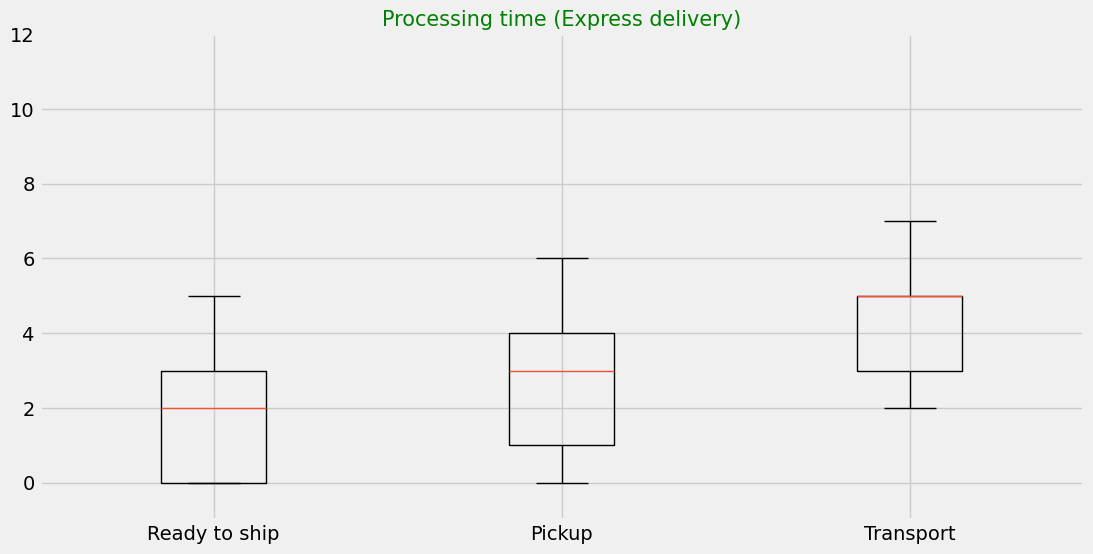

In [452]:
plt.figure(figsize=(12, 6))

plt.boxplot(x = [sub1_express['ordertoready'], sub2_express['timetoship'], sub3_express['transittime']])
plt.axis([0.5, 3.5, -1, 12])

plt.xticks(ticks=[1, 2, 3], labels=['Ready to ship', 'Pickup', 'Transport'])

plt.title('Processing time (Express delivery)', fontsize = 15, color='g')

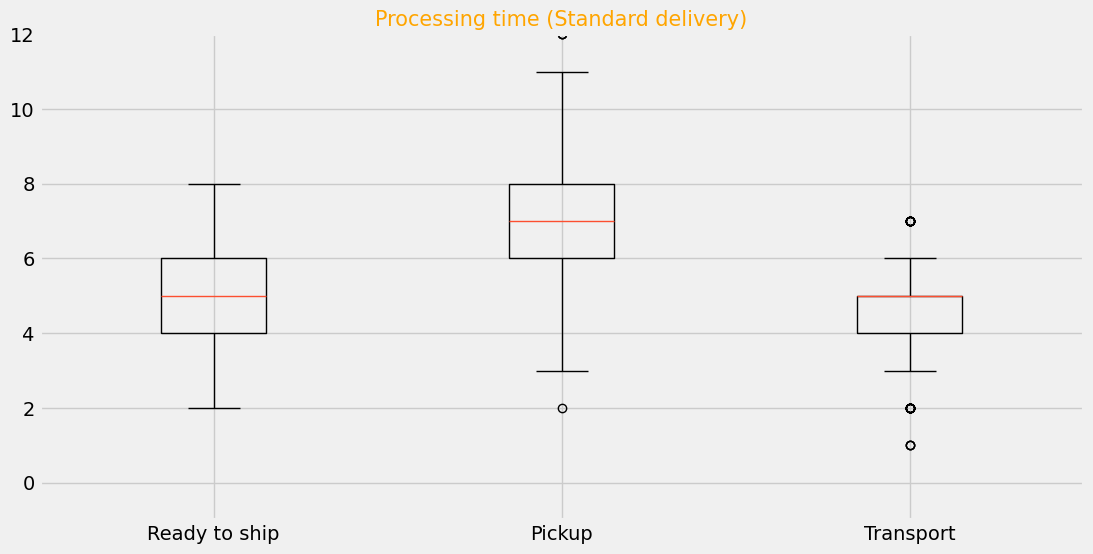

In [453]:
plt.figure(figsize=(12, 6))

plt.boxplot(x = [sub1_standard['ordertoready'], sub2_standard['timetoship'], sub3_standard['transittime']])
plt.axis([0.5, 3.5, -1, 12])

plt.xticks(ticks=[1, 2, 3], labels=['Ready to ship', 'Pickup', 'Transport'])

plt.title('Processing time (Standard delivery)', fontsize = 15, color='orange');

In [465]:
weekly = order_arrival.groupby(order_arrival['order_date'].dt.weekday).mean().reset_index()
weekly.head(7)

,order_date,ordertoready,timetoship,transittime
0,0,3.771429,6.388462,4.943396
1,1,4.312500,6.268340,4.593220
2,2,4.135135,6.141748,4.653061
3,3,3.870968,5.561243,4.619048
4,4,4.540541,5.475294,4.918919
5,5,4.000000,5.803279,4.166667
6,6,6.666667,7.355932,4.151515


In [466]:
weekly.columns

Index(['order_date', 'ordertoready', 'timetoship', 'transittime'], dtype='object')

In [468]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    7 non-null      int64  
 1   ordertoready  7 non-null      float64
 2   timetoship    7 non-null      float64
 3   transittime   7 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 352.0 bytes


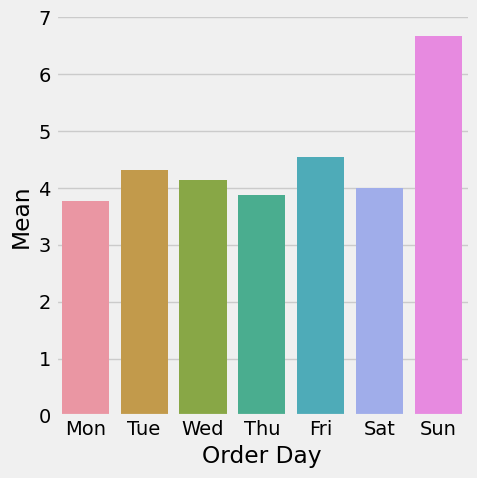

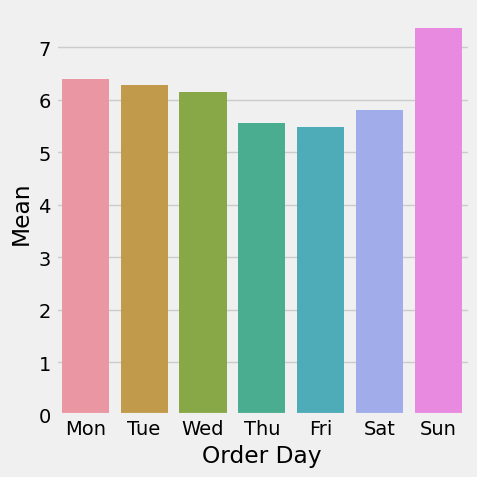

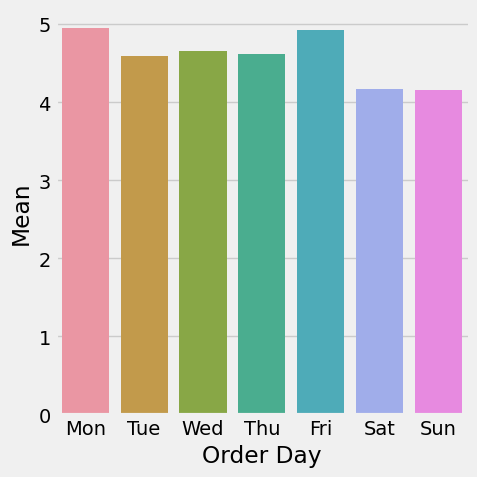

In [480]:
g = sns.catplot(x='order_date', y='ordertoready', data=weekly, kind='bar')
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
g.set_xlabels('Order Day')
g.set_ylabels('Mean')

g = sns.catplot(x='order_date', y='timetoship', data=weekly, kind='bar')
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
g.set_xlabels('Order Day')
g.set_ylabels('Mean')

g = sns.catplot(x='order_date', y='transittime', data=weekly, kind='bar')
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
g.set_xlabels('Order Day')
g.set_ylabels('Mean');